# Sales Prediction (Simple Linear Regression)

## Necessary imports

In [1]:
from sklearn.linear_model import LinearRegression
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Data collection phase

In [2]:
data = pd.read_csv("advertising.csv")

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Data analyzing

In [4]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


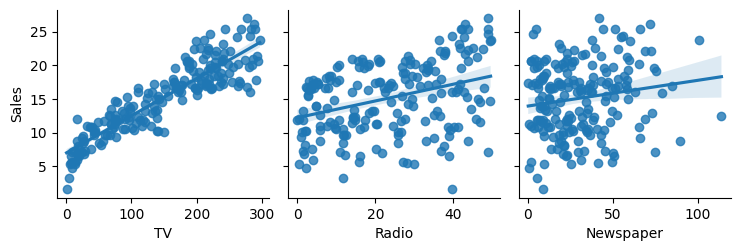

In [21]:
sns.pairplot(data, x_vars=["TV","Radio","Newspaper"],y_vars="Sales" , kind="reg")

In [17]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

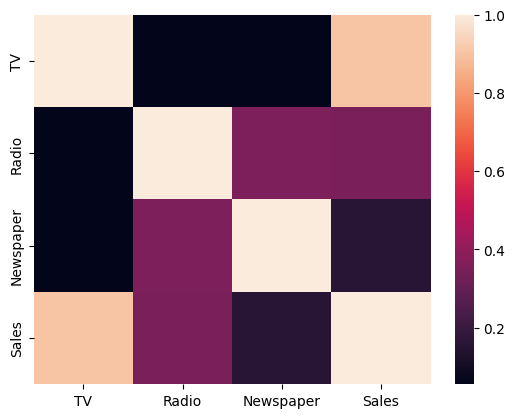

In [7]:
sns.heatmap(data.corr())

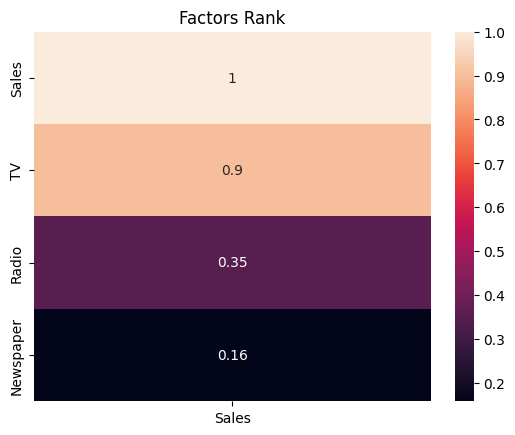

In [19]:
sns.heatmap(data.corr()[['Sales']].sort_values(by='Sales', ascending=False), annot = True)
plt.title('Factors Rank')
plt.show()

## Data Preprocessing &  Model Fitting  phase

In [8]:
X=data.drop(columns = "Sales" , axis=1)
y=data["Sales"]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
X_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
...,...,...,...
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

# Model evaluation

In [12]:
mean_absolute_error(y_test,y_pred)

1.222033210420417

In [13]:
mean_squared_error(y_test,y_pred)

2.722866082025964

In [14]:
r2_score(y_test,y_pred)

0.9031541781049791